In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
data=pd.read_csv('stock_tweet_sentiment.csv')
data.head()

,Unnamed: 0,text,timestamp,source,symbols,company_names,Sentiment
0,0,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,0
1,1,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,0
2,2,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,-1
3,3,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,1
4,4,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,-1


In [173]:
data.dropna(inplace=True)
data=data[['text','timestamp','Sentiment']]
data.head()

,text,timestamp,Sentiment
0,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,0
1,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,0
2,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,-1
3,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,1
4,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,-1


In [174]:
data['date']=pd.to_datetime(data['timestamp'])
data['date']=data['date'].dt.date
data.drop('timestamp',axis=1,inplace=True)
data.sort_values('date',inplace=True)
data.head()

/var/folders/yj/rkl37k7n6p5dqb0m36pxlx6h0000gn/T/ipykernel_64426/3717208275.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date']=pd.to_datetime(data['timestamp'])


,text,Sentiment,date
26,New time: Janet Yellen and I in conversation a...,1,2018-02-23
30,$INFO $C Asia Stocks Signal Gains; Dollar Weak...,0,2018-07-08
31,RT @dailypoliticaln: Fluor Co. $NEW $FLR Stock...,0,2018-07-08
34,EPS for Avery Dennison Corporation $AVY Expect...,0,2018-07-08
29,Arthur J Gallagher &amp; Co $AJG vs. Marsh &am...,-1,2018-07-08


In [175]:
data.shape

(28435, 3)

In [176]:
#count sentiment number by date
data=data[1:]
data.groupby('date')['Sentiment'].value_counts()

date        Sentiment
2018-07-08   0             13
            -1              5
             1              2
2018-07-09   0            416
             1            175
            -1             66
2018-07-10   0            584
             1            278
            -1             59
2018-07-11   0            590
             1            304
            -1            116
2018-07-12   0           1009
             1            424
            -1            138
2018-07-13   0            900
             1            436
            -1            121
2018-07-14   0            670
             1            280
            -1            121
2018-07-15   0           1403
             1            456
            -1            225
2018-07-16   0           2053
             1            860
            -1            332
2018-07-17   0           3076
             1           1553
            -1            447
2018-07-18   0           6608
             1           3739
            -1    

In [177]:
#if sentiment 1 per day is more than 30% then sentiment per day is 1
#if sentiment -1 per day is more than 30% then sentiment per day is -1
#otherwise sentiment per day is 0
def sentiment_per_day(df):
    if df['Sentiment'].value_counts().get(1,0)/len(df)>0.3:
        return 1
    elif df['Sentiment'].value_counts().get(-1,0)/len(df)>0.3:
        return -1
    else:
        return 0
data=data.groupby('date').apply(sentiment_per_day)
data=pd.DataFrame(data)
data.reset_index(inplace=True)
data.columns=['date','Sentiment']
data.head()

/var/folders/yj/rkl37k7n6p5dqb0m36pxlx6h0000gn/T/ipykernel_64426/3722614293.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data=data.groupby('date').apply(sentiment_per_day)


,date,Sentiment
0,2018-07-08,0
1,2018-07-09,0
2,2018-07-10,1
3,2018-07-11,1
4,2018-07-12,0


In [178]:
import yfinance as yf
voo = yf.download("VOO", start="2018-07-01", end="2018-10-01",auto_adjust=False,multi_level_index=False)
voo = voo[['Close']].reset_index()
voo['date']=voo['Date'].dt.date
voo.drop('Date',axis=1,inplace=True)
voo.head()

[*********************100%***********************]  1 of 1 completed


,Close,date
0,249.800003,2018-07-02
1,248.789993,2018-07-03
2,250.919998,2018-07-05
3,253.009995,2018-07-06
4,255.250000,2018-07-09


In [179]:
df = pd.merge(voo, data, on='date', how='left')
df.dropna(inplace=True)

In [180]:
df

,Close,date,Sentiment
4,255.250000,2018-07-09,0.0
5,256.140015,2018-07-10,1.0
6,254.389999,2018-07-11,1.0
7,256.570007,2018-07-12,0.0
8,256.790009,2018-07-13,0.0
9,256.630005,2018-07-16,0.0
10,257.730011,2018-07-17,1.0
11,258.200012,2018-07-18,1.0
12,257.220001,2018-07-19,0.0


In [181]:
df.shape

(9, 3)

In [182]:
initial_cash = 100000
cash = initial_cash
stock_units = 0
shares=0
portfolio_values = []

In [183]:
# for index, row in df.iterrows():
#     price = row["Close"]
#     sentiment = row["Sentiment"]

#     if sentiment == 1:
#         # ซื้อหุ้นด้วยเงินทั้งหมด
#         units_to_buy = cash // price
#         cash -= units_to_buy * price
#         stock_units += units_to_buy

#     elif sentiment == -1:
#         # ขายหุ้นทั้งหมด
#         cash += stock_units * price
#         stock_units = 0

#     # คำนวณมูลค่าพอร์ตวันนี้
#     portfolio_value = cash + (stock_units * price)
#     portfolio_values.append(portfolio_value)

In [184]:
for i in range(0, len(df), 3):
    chunk = df.iloc[i:i+3]
    sentiment_sum = chunk['Sentiment'].sum()
    price = chunk.iloc[-1]['Close']

    if sentiment_sum > 1:
        # Buy signal: use all cash to buy shares
        shares += cash // price
        cash -= shares * price
    elif sentiment_sum <= 0:
        # Sell signal: sell all shares
        cash += shares * price
        shares = 0

    # Track portfolio value for each day in the chunk
    for j in range(i, min(i+3, len(df))):
        portfolio_values.append(cash + shares * df.iloc[j]['Close'])

In [185]:
while len(portfolio_values) < len(df):
    portfolio_values.append(cash + shares * df.iloc[-1]['Close'])

In [186]:
df['Portfolio_Value'] = portfolio_values

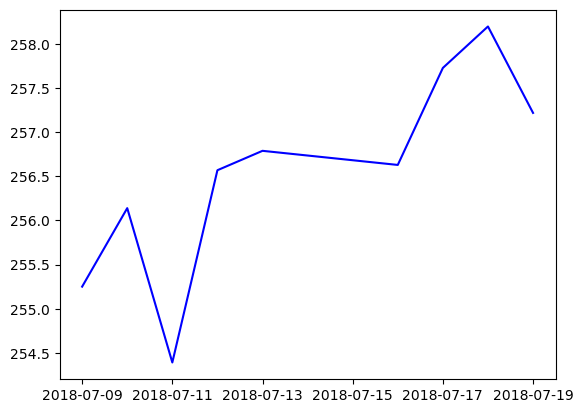

In [190]:
plt.plot(df['date'], df['Close'], label='VOO Close Price', color='blue')
plt.show()

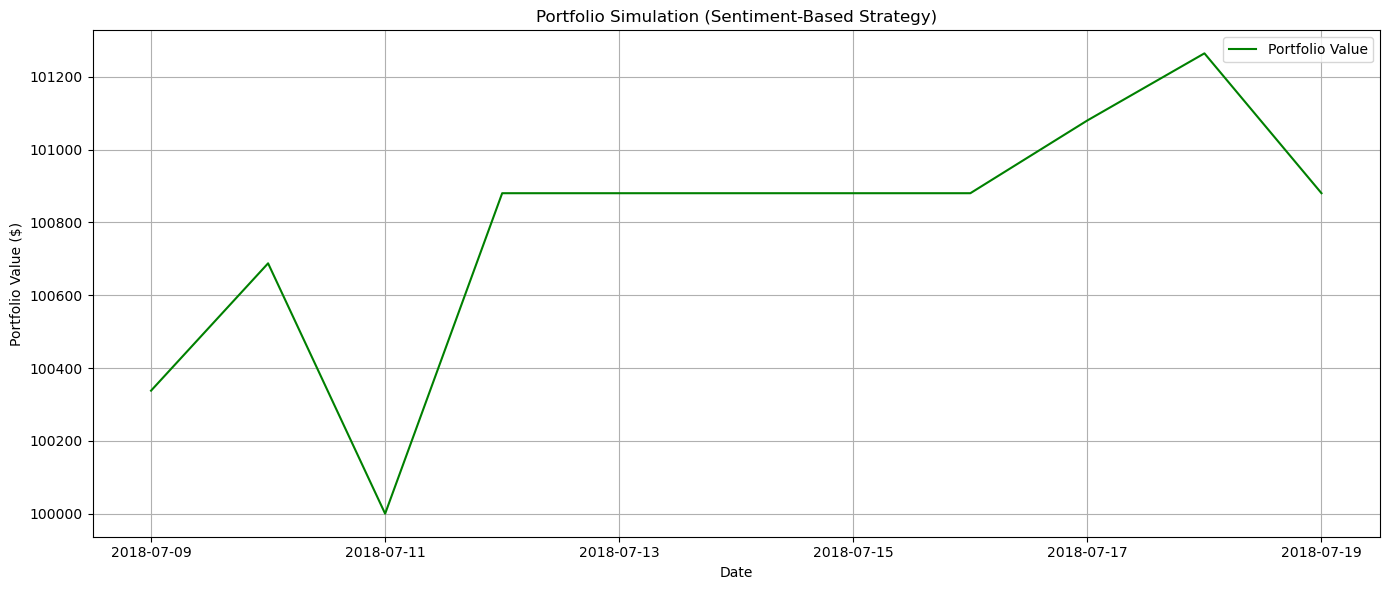

In [191]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['Portfolio_Value'], label='Portfolio Value', color='green')
plt.title('Portfolio Simulation (Sentiment-Based Strategy)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [188]:
df[["date", "Sentiment", "Close", "Portfolio_Value"]]

,date,Sentiment,Close,Portfolio_Value
4,2018-07-09,0.0,255.250000,100337.980240
5,2018-07-10,1.0,256.140015,100687.755997
6,2018-07-11,1.0,254.389999,100000.000000
7,2018-07-12,0.0,256.570007,100880.322159
8,2018-07-13,0.0,256.790009,100880.322159
9,2018-07-16,0.0,256.630005,100880.322159
10,2018-07-17,1.0,257.730011,101080.245987
11,2018-07-18,1.0,258.200012,101264.486465
12,2018-07-19,0.0,257.220001,100880.322159


In [189]:
profit = df.iloc[-1]['Portfolio_Value'] - initial_cash
print(f"Profit: {profit:.2f}")
print(f"Profit Percentage: {profit / initial_cash * 100:.2f}%")

Profit: 880.32
Profit Percentage: 0.88%
